# E-Commerce Customer Segmentation and Prediction

## Importing Necessary Libraries

In [40]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import os 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot

# Clustering Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Classification Algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data loading and processing

In [41]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Sariga\OneDrive\Documents\E-commerce customer segmentation and prediction\data\e-commerce data.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [42]:
# Display the first few rows of the dataframe
print("Initial Data Head:")
(df.head())

Initial Data Head:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [43]:
# Display concise summary of the dataframe
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [44]:
print("Columns:", df.columns.to_list())

Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [45]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [46]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [47]:
df.shape

(541909, 8)

## Data Cleansing and Preprocessing Protocol

In [48]:
# 1. Handle Missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df.shape

(406829, 8)

In [49]:
# 2. Remove Cancelled Transactions
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df.shape

(397924, 8)

In [50]:
# 3. Address Invalid Quantity and UnitPrice
df = df[df['UnitPrice'] > 0]
df = df[df['Quantity'] > 0]
df.shape

(397884, 8)

In [51]:
df = df.drop_duplicates()
df.shape

(392692, 8)

## identify the outliers

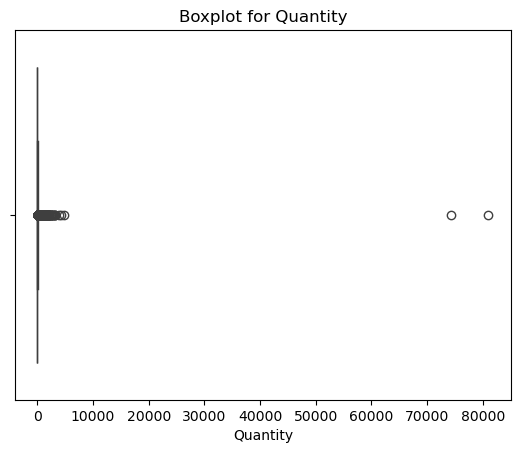

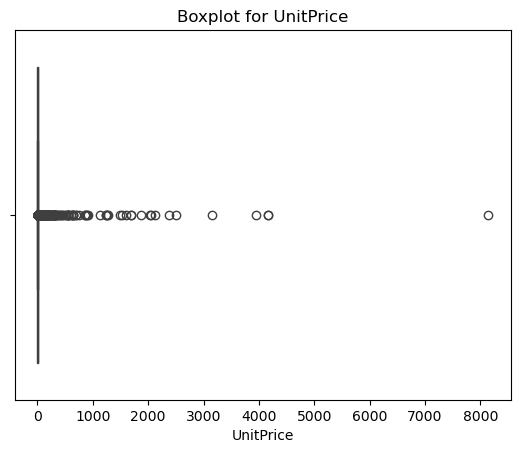

In [52]:
# Boxplot for Quantity
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot for Quantity')
plt.savefig('Boxplot_for_Quantity.png')
plt.show()

# Boxplot for UnitPrice
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot for UnitPrice')
plt.savefig('Boxplot_for_Unitprice.png')
plt.show()

In [53]:
# Function to detect outliers for a given column using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"\n Outlier Summary for '{column}':")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers in '{column}': {outliers.shape[0]}")
    print(f"Outlier Percentage: {100 * outliers.shape[0] / df.shape[0]:.2f}%")

    return outliers

# Call the function for Quantity and UnitPrice
outliers_quantity = detect_outliers_iqr(df, 'Quantity')
outliers_unitprice = detect_outliers_iqr(df, 'UnitPrice')




 Outlier Summary for 'Quantity':
Q1: 2.0
Q3: 12.0
IQR: 10.0
Lower Bound: -13.0
Upper Bound: 27.0
Number of Outliers in 'Quantity': 25616
Outlier Percentage: 6.52%

 Outlier Summary for 'UnitPrice':
Q1: 1.25
Q3: 3.75
IQR: 2.5
Lower Bound: -2.5
Upper Bound: 7.5
Number of Outliers in 'UnitPrice': 34112
Outlier Percentage: 8.69%


In [54]:
# 4. Outlier Treatment (using the IQR method for robustness)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR)))]

Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['UnitPrice'] < (Q1 - 1.5 * IQR)) | (df['UnitPrice'] > (Q3 + 1.5 * IQR)))]

print("\nShape of the dataframe after cleaning:", df.shape)


Shape of the dataframe after cleaning: (333234, 8)


In [55]:
# Create TotalPrice if not already present
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract new date-based features
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceDay'] = df['InvoiceDate'].dt.date
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,InvoiceDay,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,2011-12-09,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,2011-12-09,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-12-09,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-12-09,12


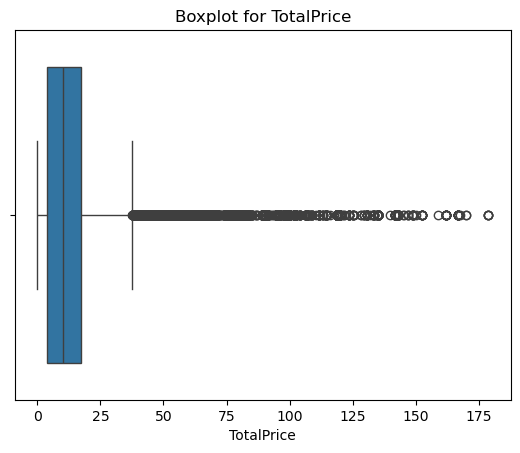

In [56]:
# Boxplot for Quantity
sns.boxplot(x=df['TotalPrice'])
plt.title('Boxplot for TotalPrice')
plt.show()

## Exploratory Data Analysis (EDA)

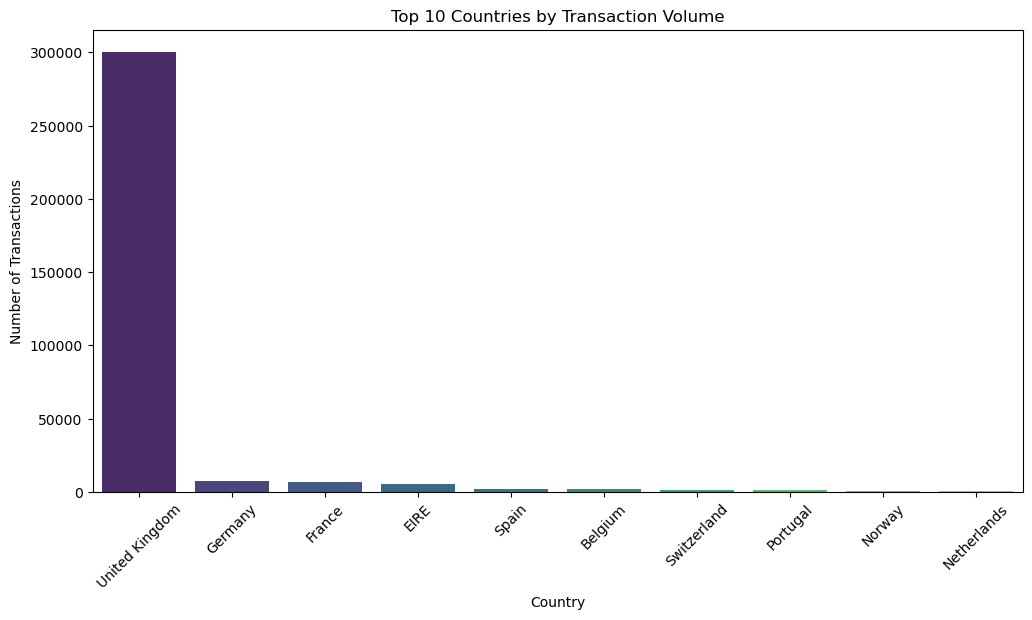

In [57]:
# --- Exploratory Data Analysis ---

# 1. Geographical Distribution of Customers
country_counts = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

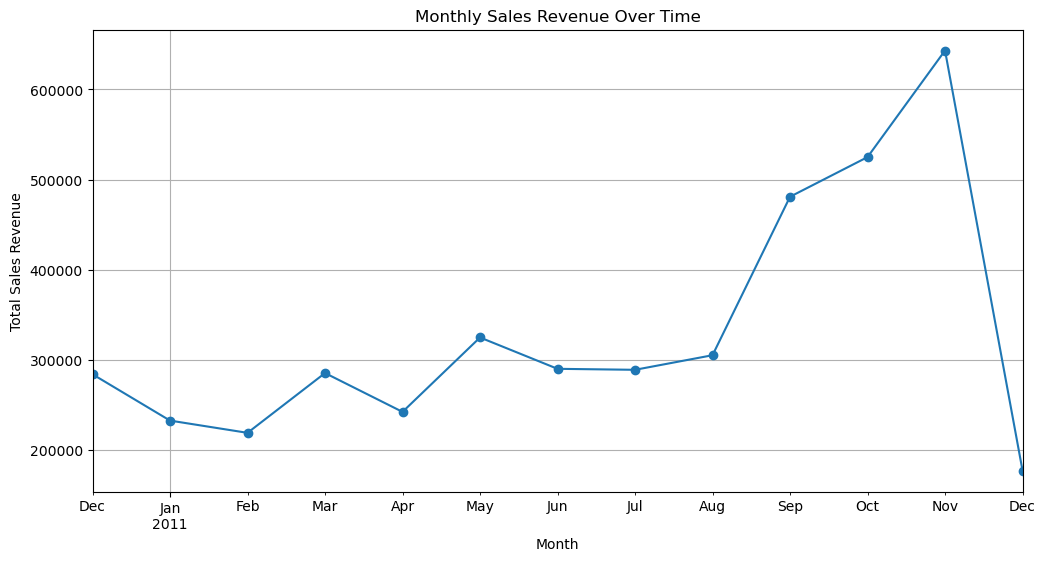

In [58]:
# 2. Sal Trends Over Tesime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.savefig('Monthly_Sales_Revenue_Over_Time.png')
plt.show()

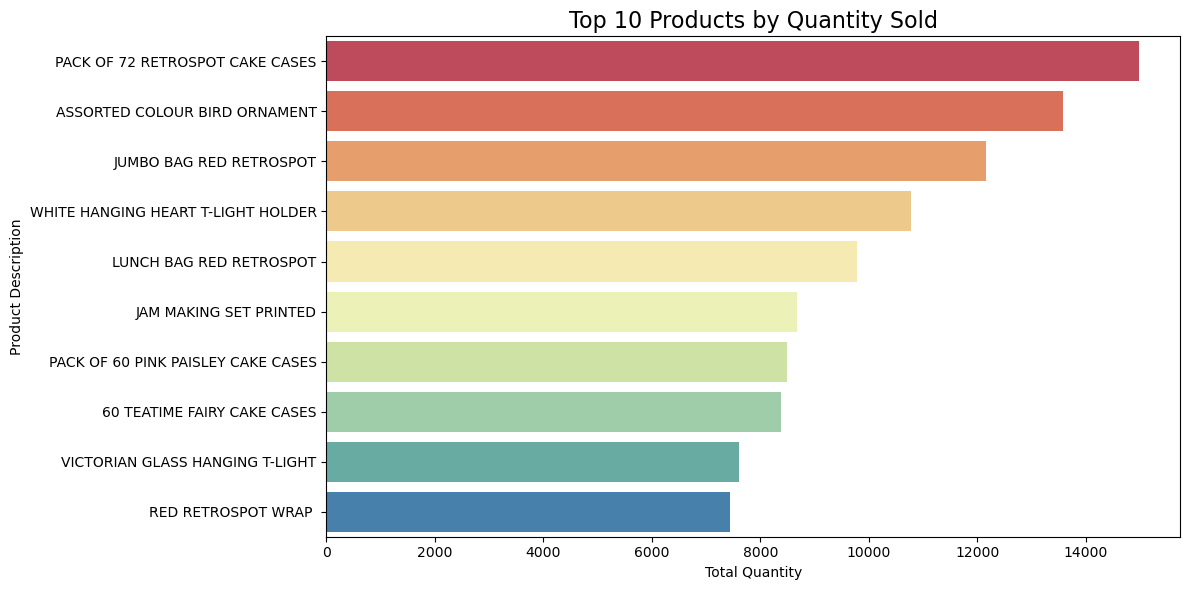

In [59]:
# Create top 10 best-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Prepare for plotting
top_products_df = top_products.reset_index()
top_products_df.columns = ['Description', 'Quantity']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_products_df,
    x='Quantity',
    y='Description',
    hue='Description',
    palette='Spectral',
    dodge=False,
    legend=False
)
plt.title("Top 10 Products by Quantity Sold", fontsize=16)
plt.xlabel("Total Quantity")
plt.ylabel("Product Description")
plt.tight_layout()
plt.savefig('Top_Products_by_Quantity_Sold.png')
plt.show()


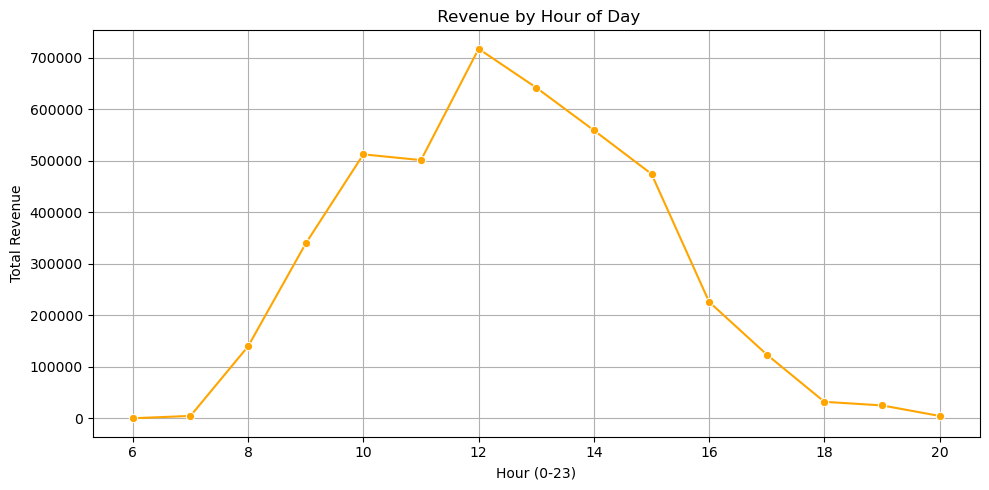

In [60]:
hourly_sales = df.groupby('InvoiceHour')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='orange')
plt.title(" Revenue by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig('Revenue_by_Hour_of_Day.png')
plt.show()

## RFM Calculation feature engineering

In [61]:
# --- RFM Feature Engineering ---
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print("Snapshot date:", snapshot_date)

Snapshot date: 2011-12-10 12:50:00


In [62]:
# 2. Calculate RFM Values
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm_df.shape

(4191, 3)

In [63]:
# Rename columns for clarity
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)

print("\nCalculated RFM Values:")
rfm_df.head()


Calculated RFM Values:


,Recency,Frequency,Monetary
CustomerID,,,
12347,2,7,3314.73
12348,249,3,90.20
12349,19,1,999.15
12350,310,1,294.40
12352,36,7,1130.94


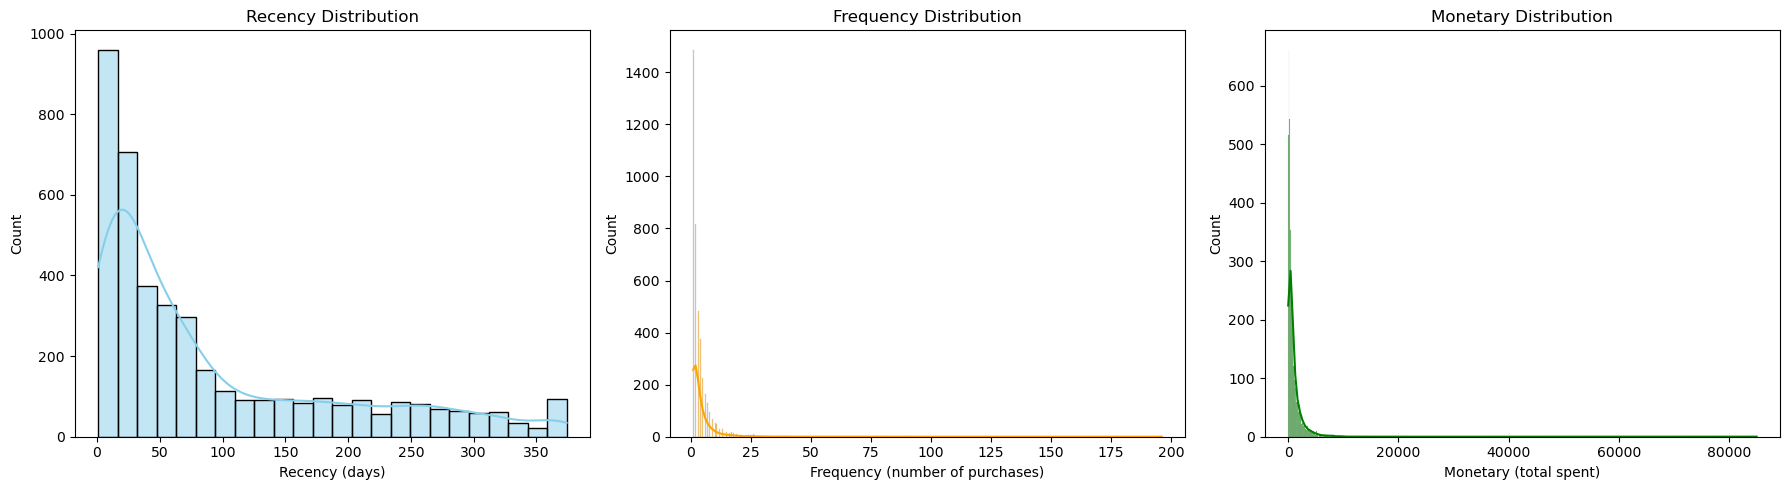

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Recency Distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')

# Frequency Distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], kde=True, color='orange')
plt.title('Frequency Distribution')
plt.xlabel('Frequency (number of purchases)')
plt.ylabel('Count')

# Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], kde=True, color='green')
plt.title('Monetary Distribution')
plt.xlabel('Monetary (total spent)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [65]:
print("Skewness of Recency:", rfm_df['Recency'].skew())
print("Skewness of Frequency:", rfm_df['Frequency'].skew())
print("Skewness of Monetary:", rfm_df['Monetary'].skew())

Skewness of Recency: 1.2446655635985338
Skewness of Frequency: 13.313118503900903
Skewness of Monetary: 17.570125378983533


In [66]:
# 3. Handle Skewness and Scale Data
# Log transformation for Frequency and Monetary
rfm_log_df = rfm_df.copy()
rfm_log_df['Frequency'] = np.log1p(rfm_log_df['Frequency'])
rfm_log_df['Monetary'] = np.log1p(rfm_log_df['Monetary'])

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log_df)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm_df.index, columns=rfm_df.columns)

print("\nScaled RFM Data:")
rfm_scaled_df.head()


Scaled RFM Data:


,Recency,Frequency,Monetary
CustomerID,,,
12347,-0.905868,1.148868,1.554928
12348,1.566687,0.100264,-1.327139
12349,-0.735692,-0.948341,0.593649
12350,2.177318,-0.948341,-0.384510
12352,-0.565516,1.148868,0.692929


## Unsupervised Segmentation Models

### K-Means Clustering

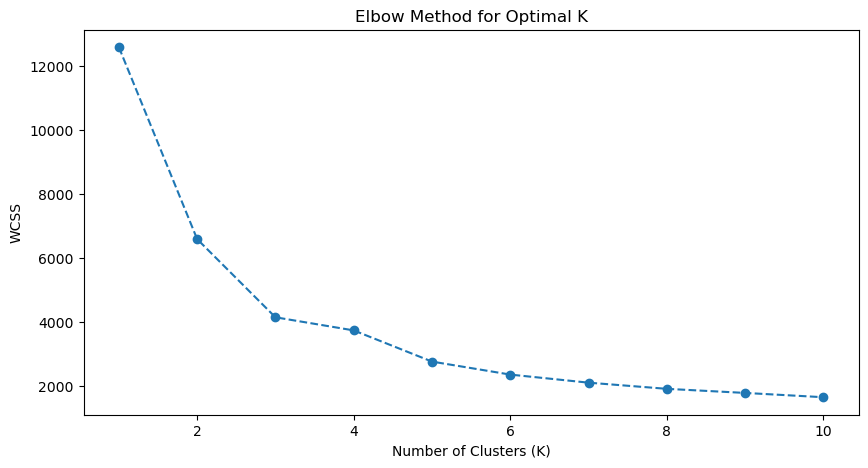

In [67]:
# --- K-Means Clustering ---

# 1. Find Optimal K using the Elbow Method
wcss =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.savefig('Elbow_method.png')
plt.show()

In [68]:

# 2. Train K-Means with Optimal K (K=5 based on the elbow)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_scaled_df)

In [69]:
# Add K-Means labels to the original RFM dataframe
rfm_df['KMeans_Cluster'] = kmeans_labels

## Hierarchical Clustering

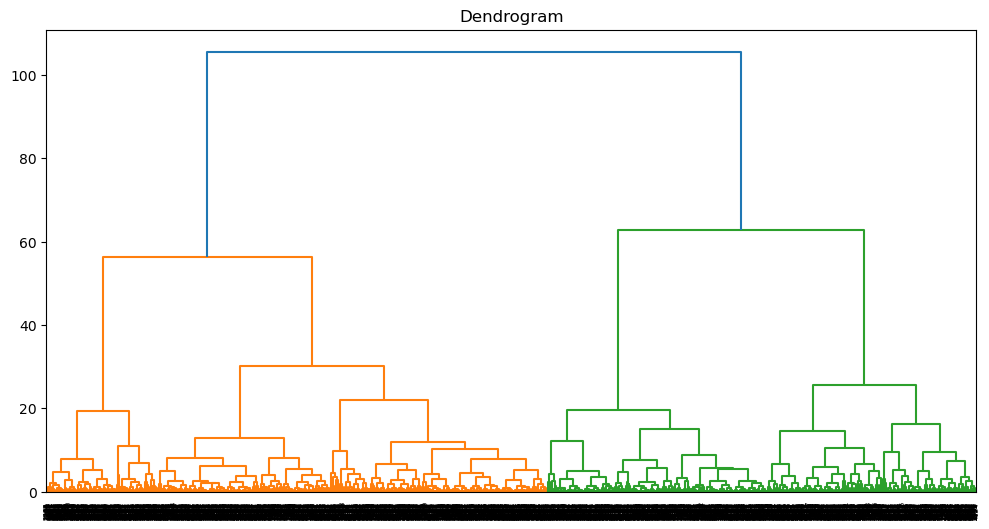

In [70]:
# --- Hierarchical Clustering ---

# 1. Create Dendrogram
plt.figure(figsize=(12, 6))
plt.title("Dendrogram")
dend = dendrogram(linkage(rfm_scaled_df, method='ward'))
plt.axhline(y=120, color='r', linestyle='--') # Cut-off line
plt.savefig('Dendrogram.png')
plt.show()


In [71]:
# 2. Train Hierarchical Clustering Model
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(rfm_scaled_df)

### DBSCAN Clustering

In [72]:
# --- DBSCAN Hyperparameter Tuning ---

from sklearn.neighbors import NearestNeighbors

# Set min_samples based on the 2*D rule
min_samples_value = 6 

# 1. Calculate the distance from each point to its nearest neighbors
# Use n_neighbors = min_samples_value
nn = NearestNeighbors(n_neighbors=min_samples_value)
nbrs = nn.fit(rfm_scaled_df)
distances, indices = nbrs.kneighbors(rfm_scaled_df)


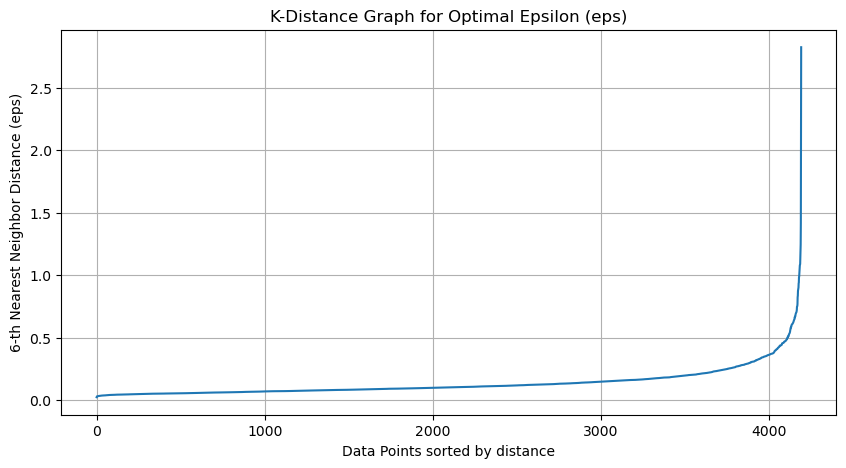

In [73]:
# 2. Sort the distances to the k-th nearest neighbor in ascending order
# The k-th distance is the last column of the distances array
k_distances = np.sort(distances[:, min_samples_value-1], axis=0)

# 3. Plot the k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.title('K-Distance Graph for Optimal Epsilon (eps)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{min_samples_value}-th Nearest Neighbor Distance (eps)')
plt.grid(True)
plt.savefig('K-Distance_Graph_for_Optimal_Epsilon.png')
plt.show()

In [74]:
# Example of using the determined values
optimal_eps = 0.5 
optimal_min_samples = 6

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan.fit_predict(rfm_scaled_df)

### Model Evaluation and Selection

In [75]:
# --- Clustering Model Evaluation ---

# Calculate scores for each model
kmeans_silhouette = silhouette_score(rfm_scaled_df, kmeans_labels)
kmeans_davies = davies_bouldin_score(rfm_scaled_df, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(rfm_scaled_df, kmeans_labels)

hierarchical_silhouette = silhouette_score(rfm_scaled_df, hierarchical_labels)
hierarchical_davies = davies_bouldin_score(rfm_scaled_df, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(rfm_scaled_df, hierarchical_labels)


In [76]:
# DBSCAN often identifies noise (-1), which needs to be handled for some metrics
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(rfm_scaled_df, dbscan_labels)
    dbscan_davies = davies_bouldin_score(rfm_scaled_df, dbscan_labels)
    dbscan_calinski = calinski_harabasz_score(rfm_scaled_df, dbscan_labels)
else:
    dbscan_silhouette, dbscan_davies, dbscan_calinski = -1, -1, -1


In [77]:
# Create a comparison table
from tabulate import tabulate

comparison_data = {
    'Algorithm': ['KMeans', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette],
    'Davies-Bouldin Index': [kmeans_davies, hierarchical_davies, dbscan_davies],
    'Calinski-Harabasz Score': [kmeans_calinski, hierarchical_calinski, dbscan_calinski]
}
comparison_df = pd.DataFrame(comparison_data)
print(tabulate(comparison_df, headers='keys', tablefmt='pretty', showindex=False))


print("\n--- Final Model Selection ---")
print("K-Means was selected due to its strong performance across all metrics and high interpretability for business use cases.")

+--------------+---------------------+----------------------+-------------------------+
|  Algorithm   |  Silhouette Score   | Davies-Bouldin Index | Calinski-Harabasz Score |
+--------------+---------------------+----------------------+-------------------------+
|    KMeans    | 0.35443705650101903 |  0.9639020326716666  |   3721.2750252686387    |
| Hierarchical |  0.298459584074621  |  1.0757760179646778  |   3371.4497785312305    |
|    DBSCAN    | 0.3197614886853431  |  2.7928316599320038  |    1181.27305434314     |
+--------------+---------------------+----------------------+-------------------------+

--- Final Model Selection ---
K-Means was selected due to its strong performance across all metrics and high interpretability for business use cases.


### Profiling the E-commerce Customer

In [91]:
# --- Segment Profiling ---

# Calculate the average RFM values for each cluster
segment_profile = rfm_df.groupby('KMeans_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print("\nSegment Profiles (Average RFM Values):")
print(segment_profile)


Segment Profiles (Average RFM Values):
   KMeans_Cluster     Recency  Frequency     Monetary
0               0   51.091775   1.410390   240.349213
1               1   39.278491   3.917736  1049.285926
2               2  283.501706   1.110922   159.605273
3               3  188.657795   1.979087   494.071599
4               4   18.727880  13.879800  3803.269850


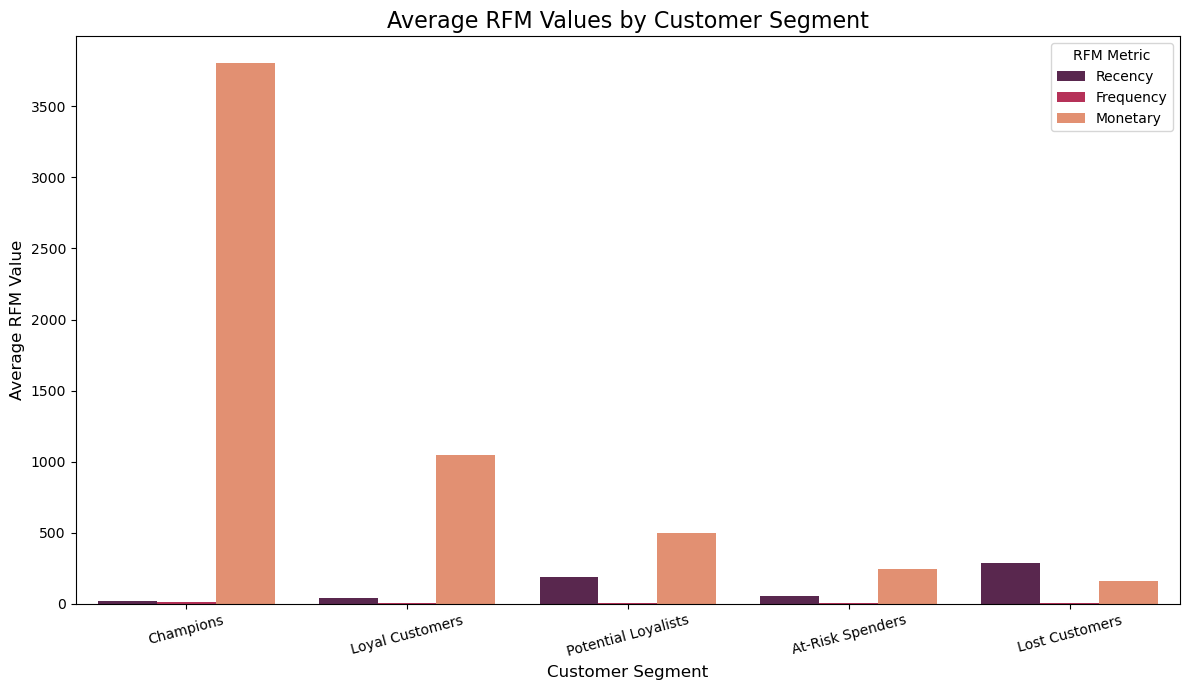

In [92]:
# 1. Create a mapping of KMeans_Cluster to Segment names
segment_names = [
    "Champions",
    "Loyal Customers",
    "Potential Loyalists",
    "At-Risk Spenders",
    "Lost Customers"
]

# Sort by Monetary to assign names (adjust if needed)
segment_profile = segment_profile.sort_values(by='Monetary', ascending=False)

# Create mapping dictionary
segment_map = {
    row['KMeans_Cluster']: name
    for name, row in zip(segment_names, segment_profile.to_dict('records'))
}

# 2. Add 'Segment' column using the mapping
segment_profile['Segment'] = segment_profile['KMeans_Cluster'].map(segment_map)

# 3. Melt for plotting
segment_profile_melted = pd.melt(
    segment_profile,
    id_vars='Segment',
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Average Value'
)

# 4. Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=segment_profile_melted,
    x='Segment',
    y='Average Value',
    hue='Metric',
    palette='rocket'
)
plt.title('Average RFM Values by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average RFM Value', fontsize=12)
plt.legend(title='RFM Metric')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('Average_RFM_Values_by_Customer_Segment.png')
plt.show()



In [93]:
# List of meaningful segment names in order of descending Monetary value
segment_names = [
    "Champions",
    "Loyal Customers",
    "Potential Loyalists",
    "At-Risk Spenders",
    "Lost Customers"
]

# Sort segment_profile by Monetary descending
segment_profile = segment_profile.sort_values(by='Monetary', ascending=False)

# Create mapping dict: cluster number -> segment name
segment_map = {
    row.KMeans_Cluster: name for name, row in zip(segment_names, segment_profile.itertuples())
}

# Map cluster numbers to segment names in your main rfm_df
rfm_df['Segment'] = rfm_df['KMeans_Cluster'].map(segment_map)

print("\nCustomer Segments with Assigned Names:")
print(rfm_df[['KMeans_Cluster', 'Segment']].head())



Customer Segments with Assigned Names:
            KMeans_Cluster          Segment
CustomerID                                 
12347                    4        Champions
12348                    2   Lost Customers
12349                    1  Loyal Customers
12350                    2   Lost Customers
12352                    1  Loyal Customers


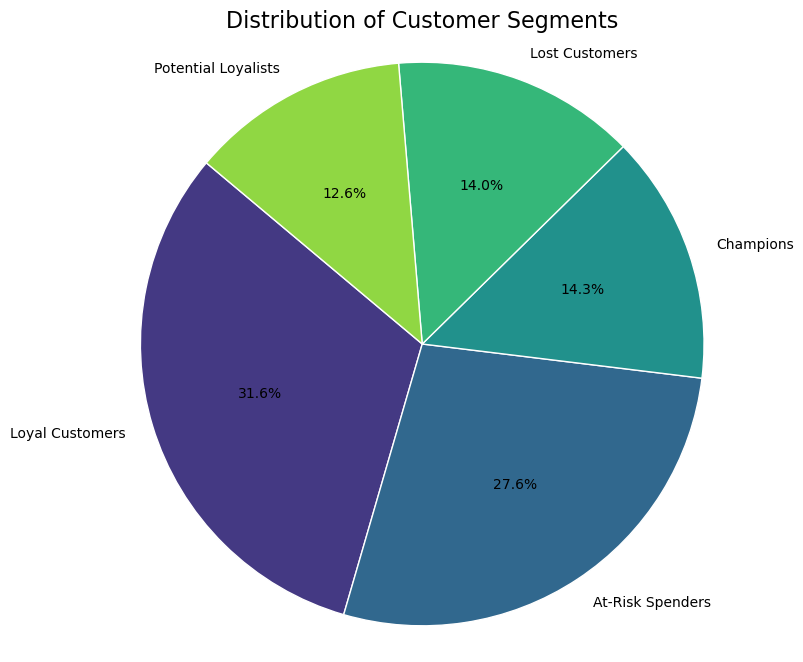

In [81]:
# Calculate the size of each segment
segment_counts = rfm_df['Segment'].value_counts()

# Define colors for the pie chart for a consistent and professional look
colors = sns.color_palette('viridis', len(segment_counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',  # Format percentages to one decimal place
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'} # Add a white edge for better separation
)
plt.title('Distribution of Customer Segments', fontsize=16)
plt.ylabel(' ') # Hide the y-label which is 'Segment' by default
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Distribution_of_Customer_Segments.png')
plt.show()

## Data Preparation for Classification

In [82]:
# --- Predictive Classification ---
from sklearn.preprocessing import LabelEncoder
# 1. Prepare Data
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['Segment']

# 2. Split data FIRST
# The use of stratify=y is excellent practice!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Encode the target variable (NEW STEP)
# Models require numerical target variables.
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# 3. Scale features AFTER splitting
scaler_pred = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler_pred.fit_transform(X_train)

# ONLY transform the test data (using the scaler fitted on the training data)
X_test_scaled = scaler_pred.transform(X_test)

In [83]:
# 2. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [84]:
# 3. Train and Evaluate Models (USE ENCODED TARGET)
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train_encoded)  # Use scaled X and encoded y
    y_pred_encoded = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    results[name] = accuracy
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_encoded, y_pred_encoded, target_names=le.classes_))
    print("-" * 30)


--- Logistic Regression ---
Accuracy: 0.9416
                     precision    recall  f1-score   support

   At-Risk Spenders       0.94      0.99      0.96       231
          Champions       0.99      0.95      0.97       120
     Lost Customers       0.90      0.92      0.91       118
    Loyal Customers       0.96      0.96      0.96       265
Potential Loyalists       0.88      0.80      0.84       105

           accuracy                           0.94       839
          macro avg       0.93      0.92      0.93       839
       weighted avg       0.94      0.94      0.94       839

------------------------------
--- Decision Tree ---
Accuracy: 0.9642
                     precision    recall  f1-score   support

   At-Risk Spenders       0.99      0.97      0.98       231
          Champions       0.97      0.97      0.97       120
     Lost Customers       0.96      0.97      0.96       118
    Loyal Customers       0.96      0.97      0.97       265
Potential Loyalists       0

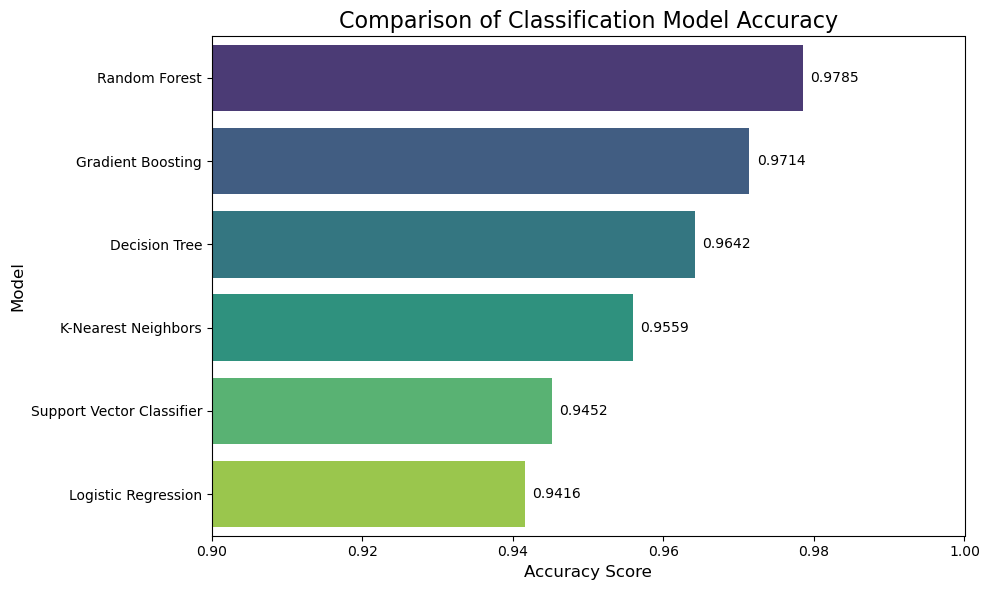

In [85]:
results = {
    "Logistic Regression": 0.9416,
    "Decision Tree": 0.9642,
    "Random Forest": 0.9785,
    "Gradient Boosting": 0.9714,
    "Support Vector Classifier": 0.9452,
    "K-Nearest Neighbors": 0.9559
}

# Convert the results dictionary to a pandas DataFrame for easy plotting
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=results_df,
    x='Accuracy',
    y='Model',
    palette='viridis'
)

# Add labels and title for clarity
plt.title('Comparison of Classification Model Accuracy', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.9, 1.0) # Set x-axis limits to focus on the high accuracy scores

# Add the accuracy values as text on each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 0.001, # x-position
        p.get_y() + p.get_height() / 2, # y-position
        f'{width:.4f}', # text label, formatted to 4 decimal places
        va='center'
    )

plt.tight_layout()
plt.savefig('Comparison_of_Classification_Model_Accuracy.png')
plt.show()

In [86]:
# 4. Select the Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Performing Model: {best_model_name} with an accuracy of {results[best_model_name]:.4f}")


Best Performing Model: Random Forest with an accuracy of 0.9785


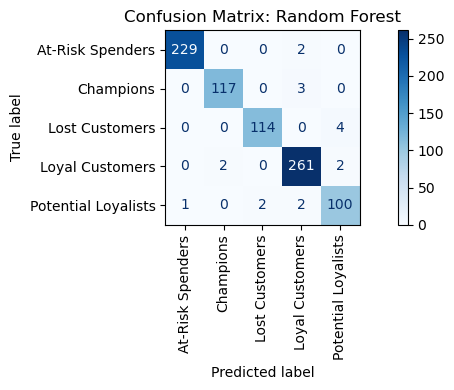

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 4))
ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test_scaled,
    y_test_encoded,
    ax=ax,
    cmap='Blues',
    xticks_rotation='vertical',
    display_labels=le.classes_  # To show readable segment names
)
ax.set_title(f"Confusion Matrix: {best_model_name}")
plt.tight_layout()
plt.savefig('Confusion Matrix.png')
plt.show()


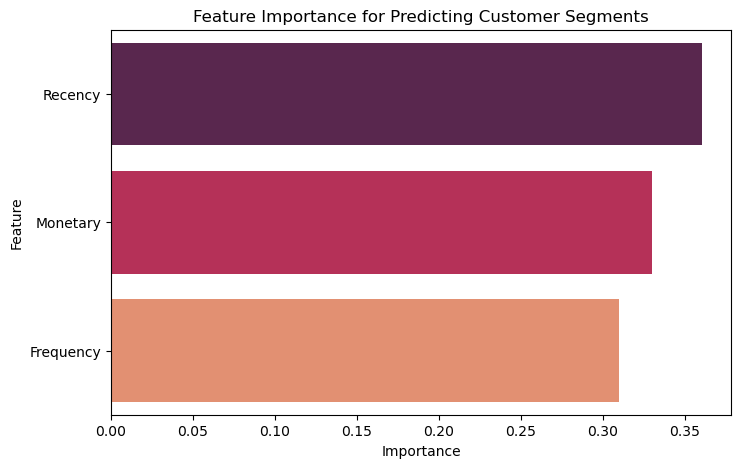

In [88]:
# 2. Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
plt.title('Feature Importance for Predicting Customer Segments')
plt.savefig('feature_importance.png')
plt.show()

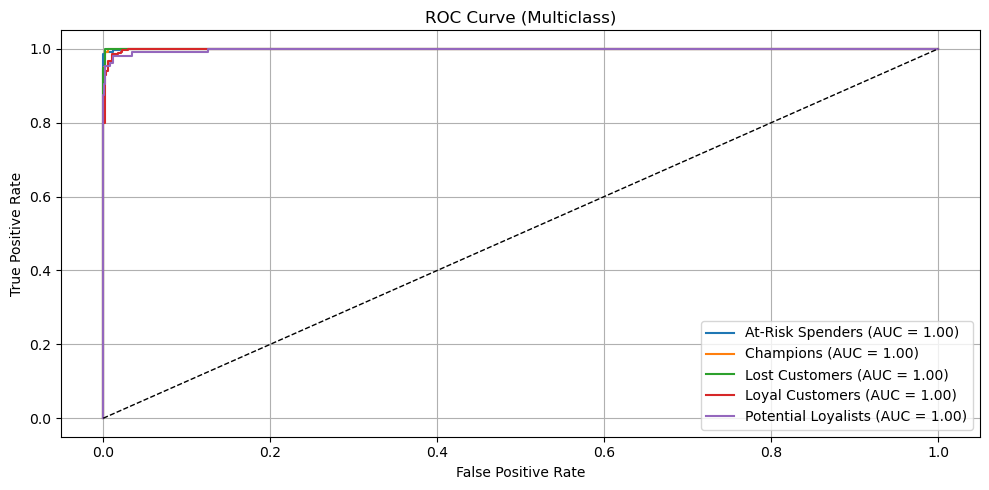

In [89]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Binarize the labels for One-vs-Rest multiclass ROC
y_test_binarized = label_binarize(y_test_encoded, classes=range(len(le.classes_)))

# Re-train a One-vs-Rest classifier (only for plotting ROC)
ovr_model = OneVsRestClassifier(best_model)
y_score = ovr_model.fit(X_train_scaled, y_train_encoded).predict_proba(X_test_scaled)

# Plot ROC curve for each class
plt.figure(figsize=(10,5))
for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('ROC_Curve_(Multiclass).png')
plt.show()


In [90]:
import joblib
os.makedirs('saved_models', exist_ok=True)

# Save the StandardScaler
joblib.dump(scaler_pred, 'saved_models/scaler_pred.pkl')

# Save the LabelEncoder
joblib.dump(le, 'saved_models/label_encoder.pkl')

# Save the trained classifier (e.g., Random Forest)
joblib.dump(best_model, 'saved_models/rf_classifier.pkl')  # use best_model or rf_classifier as per your variable name

# Save the DataFrame with segments
rfm_df.to_csv('saved_models/rfm_with_segments.csv', index=False)


In [95]:
# 1. Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# 2. Train, predict, and collect results
results = []

for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train_encoded)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Compute metrics
    acc = accuracy_score(y_test_encoded, y_pred)
    prec = precision_score(y_test_encoded, y_pred, average='weighted')
    rec = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    # Append to results
    results.append({
        'Model': name,
        'Accuracy (%)': round(acc * 100, 2),
        'Precision': round(prec, 2),
        'Recall': round(rec, 2),
        'F1-Score': round(f1, 2)
    })

# 3. Create and display DataFrame
comparison_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
print("\n🔍 Final Model Performance Comparison:")
print(comparison_df.to_string(index=False))

 


🔍 Final Model Performance Comparison:
                    Model  Accuracy (%)  Precision  Recall  F1-Score
            Random Forest         97.85       0.98    0.98      0.98
        Gradient Boosting         97.14       0.97    0.97      0.97
            Decision Tree         96.42       0.96    0.96      0.96
      K-Nearest Neighbors         95.59       0.96    0.96      0.96
Support Vector Classifier         94.52       0.95    0.95      0.95
      Logistic Regression         94.16       0.94    0.94      0.94
